In [ ]:
%matplotlib inline

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import pandas as  pd

import random
import os


In [ ]:
class config:
    seed = 42

In [ ]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

In [ ]:
seed_everything(config.seed)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
batch_size = 1

In [ ]:
### transform 설정
normalize = transforms.Normalize(mean=[x/255.0 for x in [125.3, 123.0, 113.9]],std=[x/255.0 for x in [63.0, 62.1, 66.7]])

transform0 = transforms.Compose([                transforms.ToTensor(),normalize,])

transform_array = []
#transform_array.append(transform0)
for i in [0,1]:
    for j in [0,5,15]:
        for k in [0,0.1,0.2,0.3,0.4]:
            transform1  = transforms.Compose([transforms.RandomHorizontalFlip(p = i),transforms.RandomRotation(degrees = j),transforms.RandomAffine(degrees = 0, translate =(k,k)),  transforms.ToTensor(), normalize, ])  
            transform_array.append(transform1)



In [ ]:
trainset0 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform0) 
trainloader0 = torch.utils.data.DataLoader(trainset0, batch_size=batch_size, shuffle=False, num_workers=2)

trainset_array = []
trainloader_array = []

#trainset_array.append(trainset0)
#trainloader_array.append(trainloader0)

for i in range(len(transform_array)):
    trainset1 = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform_array[i]) 
    trainloader1 = torch.utils.data.DataLoader(trainset1, batch_size=batch_size, shuffle=False, num_workers=2) 

    trainset_array.append(trainset1)
    trainloader_array.append(trainloader1)


Files already downloaded and verified


In [ ]:
trainset0

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.4913725490196078, 0.4823529411764706, 0.4466666666666667], std=[0.24705882352941178, 0.24352941176470588, 0.2615686274509804])
           )

In [ ]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


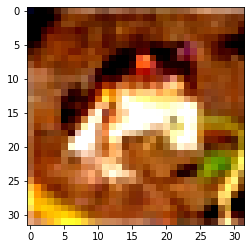

 frog


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


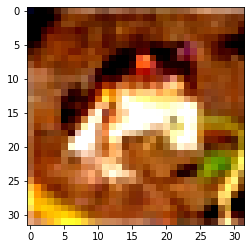

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


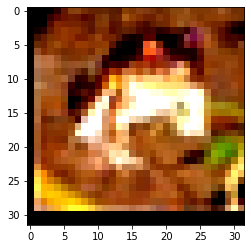

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


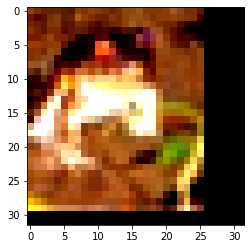

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


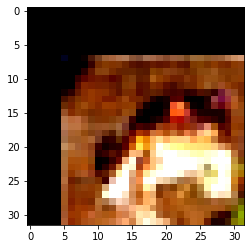

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


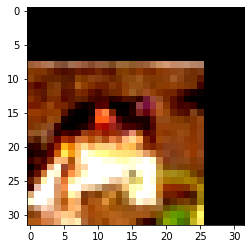

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


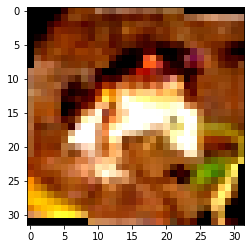

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


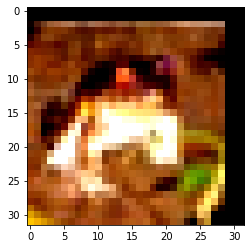

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


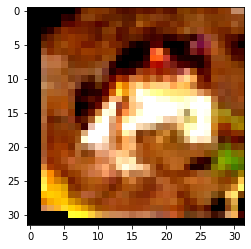

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


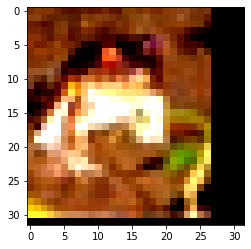

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


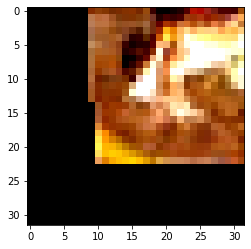

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


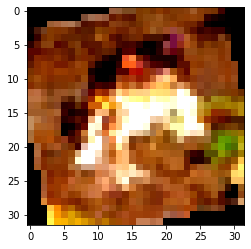

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


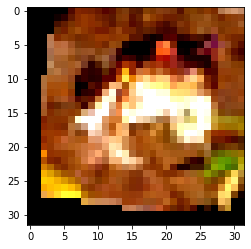

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


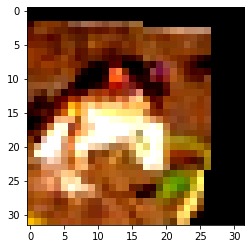

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


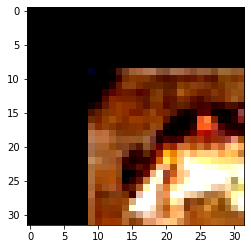

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


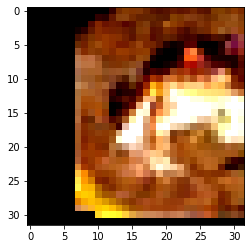

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


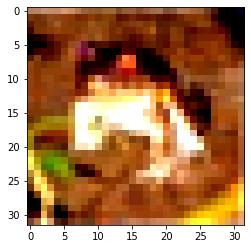

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


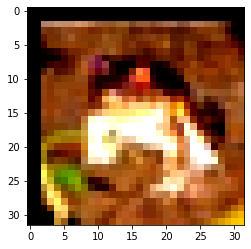

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


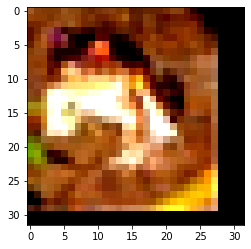

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


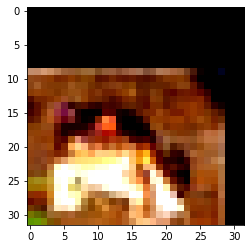

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


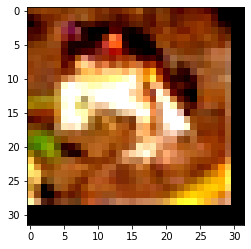

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


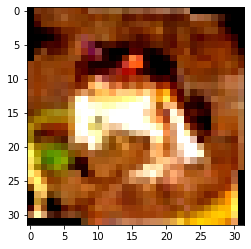

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


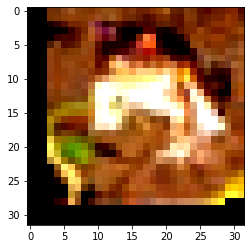

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


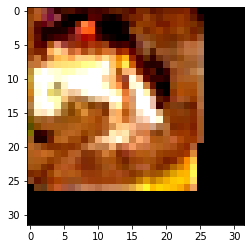

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


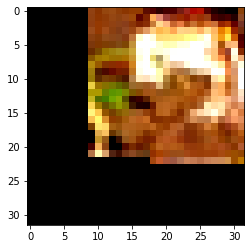

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


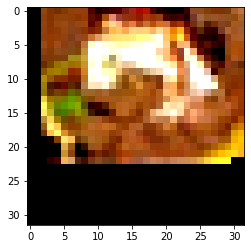

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


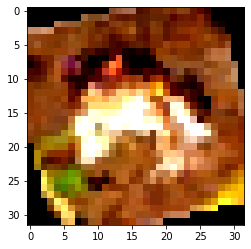

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


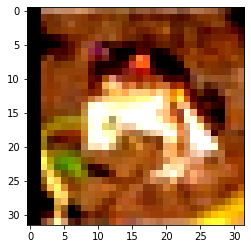

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


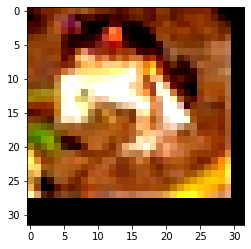

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


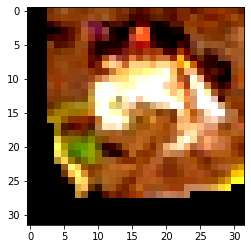

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


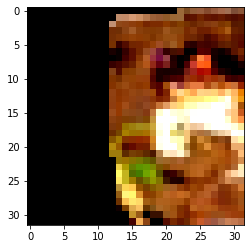

In [ ]:
# get some random training images
dataiter0 = iter(trainloader0)
images0, labels0 = dataiter0.next()

# show images
imshow(torchvision.utils.make_grid(images0))
# print labels
print(' '.join('%5s' % classes[labels0[j]] for j in range(batch_size)))
#####################################################################################

for i in range(len(transform_array)):
    dataiter1 = iter(trainloader_array[i])
    images1, labels1 = dataiter1.next()
    imshow(torchvision.utils.make_grid(images1))    


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
def training(model,trainloder_x) :
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    model.train()
    for epoch in range(10):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloder_x, 0):
            # get the inputs; data is a list of [inputs, labels]
            #inputs, labels = data
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training')   

In [ ]:
training(net,trainloader0)

[1,  2000] loss: 2.153
[1,  4000] loss: 1.986
[1,  6000] loss: 1.877
[1,  8000] loss: 1.835
[1, 10000] loss: 1.789
[1, 12000] loss: 1.769
[1, 14000] loss: 1.752
[1, 16000] loss: 1.782
[1, 18000] loss: 1.740
[1, 20000] loss: 1.741
[1, 22000] loss: 1.702
[1, 24000] loss: 1.673
[1, 26000] loss: 1.659
[1, 28000] loss: 1.690
[1, 30000] loss: 1.678
[1, 32000] loss: 1.661
[1, 34000] loss: 1.733
[1, 36000] loss: 1.693
[1, 38000] loss: 1.671
[1, 40000] loss: 1.675
[1, 42000] loss: 1.655
[1, 44000] loss: 1.686
[1, 46000] loss: 1.663
[1, 48000] loss: 1.638
[1, 50000] loss: 1.663
[2,  2000] loss: 1.624
[2,  4000] loss: 1.642
[2,  6000] loss: 1.630
[2,  8000] loss: 1.613
[2, 10000] loss: 1.615
[2, 12000] loss: 1.666
[2, 14000] loss: 1.625
[2, 16000] loss: 1.660
[2, 18000] loss: 1.579
[2, 20000] loss: 1.621
[2, 22000] loss: 1.630
[2, 24000] loss: 1.583
[2, 26000] loss: 1.568
[2, 28000] loss: 1.617
[2, 30000] loss: 1.554
[2, 32000] loss: 1.566
[2, 34000] loss: 1.683
[2, 36000] loss: 1.629
[2, 38000] 

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/졸업논문/cifar_net.pth'
#torch.save(net.state_dict(), PATH)

In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform0) # test set을 가져옴
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2) # 가져온 test set을 data loader에 올림

Files already downloaded and verified


In [ ]:
def evalmodel(model, dataloader) :
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for data in dataloader:
            #images, labels = data
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(100 * correct / total)

In [ ]:
evalmodel(net,trainloader1)
evalmodel(net,testloader)

18.448
40.87


In [ ]:
import cv2 
from google.colab.patches import cv2_imshow

In [ ]:
def hist_save(hist_array,dataloader) :
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        # image_array_1.append(np.transpose(inputs[0], (1,2,0)).numpy())
        #---① 각 이미지를 HSV로 변환
        hsv = cv2.cvtColor(np.transpose(inputs[0], (1,2,0)).numpy(), cv2.COLOR_BGR2HSV)
        #---② H,S 채널에 대한 히스토그램 계산
        hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
        #---③ 0~1로 정규화
        cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
        hist_array.append(hist)
        if i == 499 :
            break    

In [ ]:
hist_array = []

hist_0 = [] 
hist_save(hist_0,trainloader0)


hist_elements_array = []   
for i in range(len(transform_array)):
    hist_elements_array = []    
    hist_save(hist_elements_array,trainloader_array[i])
    hist_array.append(hist_elements_array)

In [ ]:
def hist_sim(hist_1,hist_2):
    ret_total = 0
    for i in range(500):
        ret = cv2.compareHist(hist_1[i], hist_2[i], cv2.HISTCMP_CORREL)
        ret_total = ret_total+ret
    print(ret_total/500)   

In [ ]:
len(hist_array)

30

In [ ]:
for i in range(len(transform_array)):
    print(i)
    hist_sim(hist_0,hist_array[i])

0
1.0
1
0.6036634734061878
2
0.406050536592447
3
0.32885639857809706
4
0.2642144935355859
5
0.9251359502102076
6
0.5591853175560082
7
0.3898940409597911
8
0.29761608281827245
9
0.24483336945025902
10
0.7451328425704349
11
0.49397217282858763
12
0.35985765677160714
13
0.29132031568034183
14
0.23958423922437344
15
1.0
16
0.5952478767668906
17
0.4017066236342173
18
0.3024312076986534
19
0.2656643910357754
20
0.9101075434583684
21
0.5624522609743141
22
0.3946374093779041
23
0.30469618929383696
24
0.2570009817943434
25
0.7435114131992707
26
0.5079849847719161
27
0.36499938717055314
28
0.28863170537311816
29
0.24290356605970911


In [ ]:
methods = {'CORREL' :cv2.HISTCMP_CORREL,                # cv2.HISTCMP_CORREL: 상관관계 (1: 완전 일치, -1: 완전 불일치, 0: 무관계)
        'CHISQR':cv2.HISTCMP_CHISQR,                 # cv2.HISTCMP_CHISQR: 카이제곱 (0: 완전 일치, 무한대: 완전 불일치)
        'INTERSECT':cv2.HISTCMP_INTERSECT,           # cv2.HISTCMP_INTERSECT: 교차 (1: 완전 일치, 0: 완전 불일치 - 1로 정규화한 경우)
        'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}   # cv2.HISTCMP_BHATTACHARYYA 값이 작을수록 유사한 것으로 판단
all_compare = []
for l in range(len(hists)):
 query = hists[l]
 part_compare = []
 for j, (name, flag) in enumerate(methods.items()):
     print('%-10s'%name, end='\t')
     feat_compare = []
     for i, (hist, img) in enumerate(zip(hists, imgs)):
         #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
         ret = cv2.compareHist(query, hist, flag)
         if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우
             ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
         print("img%d_%d:%7.2f"% (l,i+1 , ret), end='\t')
         feat_compare.append(ret)
     part_compare.append(feat_compare)
     print()

 all_compare.append(part_compare)

NameError: ignored